# 신경망 개요
퍼셉트론의 가중치 결정을 자동으로 학습

n층 신경망
- 입력층 : 0층
- 은닉층 : 1~(n-1)층
- 출력층 : n층

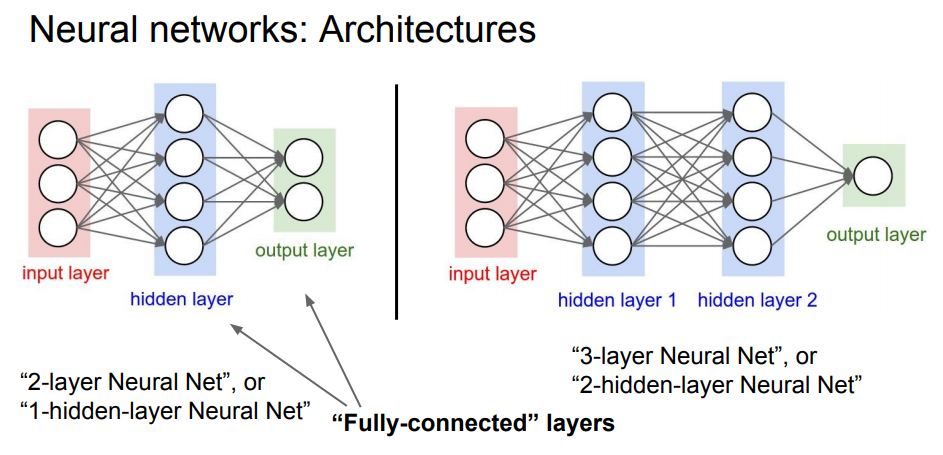

- 단순 퍼셉트론 : 계단 함수를 활성화 함수로 사용하는 단층 네트워크
- 다층 퍼셉트론 : 매끈한 활성화 함수(시그모이드 함수 등)를 사용하는 다층 네트워크; 신경망

# 활성화 함수 $h(x)$
가중 입력 신호의 총합을 출력 신호로 변환

- 선형 함수 : $f(x)=ax+b$
- 비선형 함수 : 선형이 아닌 함수로, 하나의 직선으로 그려지지 않는 함수  

$\star$ 여러 선형 함수의 합성 함수는 하나의 선형 함수로 표현 가능  
$\quad\Longrightarrow$ 선형 활성화 함수를 사용하면 신경망의 은닉층을 구성하는 것이 무의미  
$\qquad\Longrightarrow$ 다층 신경망은 항상 비선형 활성화 함수를 사용

## 계단 함수

$h(x)=\begin{cases}0&(x\leq0)\\1&(x>0)\end{cases}$

In [60]:
import numpy as np

In [61]:
def step(x):
  return (x>0).astype(int)

x = np.array([-1.0,1.0,2.0])
step(x)

array([0, 1, 1])

In [62]:
import matplotlib.pyplot as plt

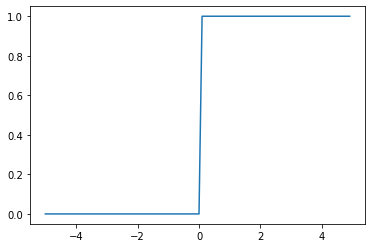

In [63]:
x = np.arange(-5.0,5.0,0.1)
y = step(x)
plt.plot(x,y);

## 시그모이드 함수

$h(x)=\cfrac{1}{1+e^{-x}}$

In [64]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

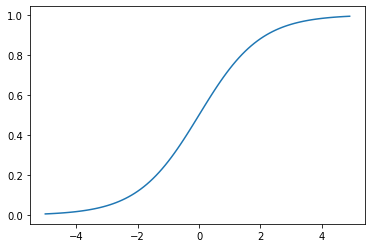

In [65]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y);

## ReLU 함수

$h(x)=\begin{cases}x&(x>0)\\0&(x\leq0)\end{cases}$

In [66]:
def relu(x):
  return np.maximum(0,x)

x = np.array([-1.0,1.0,2.0])
relu(x)

array([0., 1., 2.])

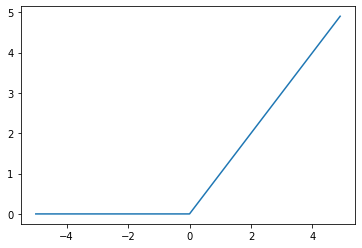

In [67]:
x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y);

# 3층 신경망 구현

- 0층(입력층) : 2개
- 1층(은닉층) : 3개
- 2층(은닉층) : 2개
- 3층(출력층) : 2개

## 신호 전달 구현

가중치 표기

${\Huge W^{(k)}=\left(w_{ji}^{(k)}\right),\qquad B^{(k)}=\left(b_j^{(k)}\right)}$  
- 가중치 행렬에서의 위치 : $i$ 행 $j$ 열
- $k$ : 다음 층 번호 ; 1~(출력층 번호 $n$)
- $j$ : 다음 층에서 뉴런 번호 ; 1~(다음 층 뉴런 개수)
- $i$ : 앞 층에서 뉴런 번호 ; 1~(앞 층 뉴런 개수)

ex. 1층의 1번 뉴런으로 가는 신호
> ${\Large a_1^{(1)}=w_{11}^{(1)}x_1+w_{12}^{(1)}x_2+b_1^{(1)}}$

$\star$ 신호를 다음 층으로 전달할 때의 가중치 행렬 계산 식

${\Huge A^{(k)}=XW^{(k)}+B^{(k)}}$

활성화

${\Large h(A^{(k)})}$
- 출력층 $(k=n)$의 활성화 함수
> $h(A^{(n)})=\begin{cases}A^{(n)}\,,&regression\\sigmoid(A^{(n)})\,,&binary\,classification\\softmax(A^{(n)})\,,&multiclass\,classification\end{cases}$

In [68]:
# 0층(입력층 ; 뉴런 2개)에서 1층(뉴런 3개)으로 신호 전달 - 가중치 행렬 shape : (2,3) / 편향 3개
X = np.array([1.0,0.5]) # 입력 신호
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) # 1층으로 가는 가중치
B1 = np.array([0.1,0.2,0.3]) # 1층으로 가는 편향

A1 = np.dot(X,W1)+B1 # 가중 신호의 총합
print(A1)

[0.3 0.7 1.1]


In [69]:
# sigmoid 활성화
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [70]:
# 1층(뉴런 3개)에서 2층(뉴런 2개)으로 신호 전달 - 가중치 행렬 shape : (3,2) / 편향 2개
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

A2 = np.dot(Z1,W2)+B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [71]:
# 2층(뉴런 2개)에서 3층(출력층 ; 뉴런 2개)으로 신호 전달 - 가중치 행렬 shape : (2,2) / 편향 2개
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3)+B3
print(A3)
Y = A3 # 항등 함수로 활성화(회귀)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


## 구현 형식 정리

- 순전파 : 학습한 매개변수를 이용해 추론하는 과정

In [72]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1'] = np.array([0.1,0.2,0.3])
  network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2'] = np.array([0.1,0.2])
  network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
  network['b3'] = np.array([0.1,0.2])
  return network

def forward(network,x):
  W1,W2,W3 = network['W1'],network['W2'],network['W3']
  b1,b2,b3 = network['b1'],network['b2'],network['b3']
  a1 = np.dot(x,W1)+b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2)+b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3)+b3
  y = a3
  return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


# 출력층 설계

## 소프트맥스 함수

분류에서 출력으로 사용

$y_k=\cfrac{exp(a_k)}{\sum\limits_{i=1}^nexp(a_i)}=\cfrac{exp(a_k-C)}{\sum\limits_{i=1}^nexp(a_i-C)}$  
단, C는 오버플로우를 방지하기 위한 상수로, 가중 신호 중 최댓값을 이용
- 소프트맥스 함수의 출력은 0과 1사이로, 총합은 1 $\rightarrow$ 확률로 해석 가능
- 가중 신호의 대소 관계는 보존되므로 현업의 추론 단계에서는 자원 절약을 위해 일반적으로 소프트맥스 함수를 생략(신경망의 학습 단계에서는 소프트맥스 함수 사용)

In [73]:
def softmax(a):
  c = np.max(a)
  return np.exp(a-c) / np.sum(np.exp(a-c))

a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


## 뉴런 개수 결정

해결하려는 문제에 맞게 적절히 결정
- 분류 : 클래스 개수 ; 각 클래스에 대한 확률을 출력
> ex. 손글씨 숫자 이미지를 0~9 중 하나로 분류하려면 출력층에 10개의 뉴런 사용

# MNIST 데이터셋 추론

In [74]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
y_train = y_train.reshape(60000,)
x_test = x_test.reshape(10000,784)
y_test = y_test.reshape(10000,)

In [75]:
from PIL import Image
print(y_train[0])
Image.fromarray(x_train[0].reshape(28,28))

5


3층 신경망
- 0층(입력층) : 784개(pixel 개수)
- 1층(은닉층) : 50개
- 2층(은닉층) : 100개
- 3층(출력층) : 10개(클래스 개수 ; 0~9)

In [76]:
import pickle
def init_network(): # 교재 깃허브 저장소에서 sample_weight.pkl 받아서 코랩에 업로드 후 사용
  with open('sample_weight.pkl','rb') as f:
    network = pickle.load(f)
  # f = open('sample_weight.pkl','rb')
  # network = pickle.load(f)
  # f.close()
  # 위처럼 코드를 작성해도 됨
  # with open(...) as f: 로 쓰면 with문 블럭이 끝난 후 자동으로 f를 close
  return network # 층별 매개변수(가중치와 편향)를 저장한 딕셔너리 반환

def predict(network,x):
  W1,W2,W3 = network['W1'],network['W2'],network['W3']
  b1,b2,b3 = network['b1'],network['b2'],network['b3']
  a1 = np.dot(x,W1)+b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2)+b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3)+b3
  y = softmax(a3)
  return y # 0~9에 대한 확률 반환

In [77]:
for i in range(1,4):
  print(f'W{i} :',init_network()[f'W{i}'].shape)
  print(f'b{i} :',init_network()[f'b{i}'].shape)

W1 : (784, 50)
b1 : (50,)
W2 : (50, 100)
b2 : (100,)
W3 : (100, 10)
b3 : (10,)


In [78]:
x = x_test/255 # 정규화
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
  y_pred = predict(network,x[i]) # 0~9에 대한 확률
  p = np.argmax(y_pred) # 확률이 최대인 인덱스(예측한 클래스)
  if p==y_test[i]:
    accuracy_cnt += 1
print('Accuracy :', accuracy_cnt/len(x)) # 10000개 중 9352개 분류 성공

Accuracy : 0.9352


(참고)
- 정규화 : 데이터의 확산 범위 제한
- 표준화 : 평균 중심화 및 단위 표준편차
- 백색화 : 특성 간 비상관화 및 단위 분산

배치(batch) 처리 : 입력 데이터를 묶음 $\rightarrow$ 여러 개의 작은 배열 대신 하나의 큰 배열을 계산하여 효율 증대

In [79]:
x = x_test/255
network = init_network()
accuracy_cnt = 0

batch_size = 100

for i in range(0,len(x),batch_size):
  x_batch = x[i:i+batch_size] # (100,784)
  y_pred_batch = predict(network,x_batch) # (100,10)
  p = np.argmax(y_pred_batch,axis=1)
  accuracy_cnt += np.sum(p==y_test[i:i+batch_size])
print('Accuracy :', accuracy_cnt/len(x))

Accuracy : 0.9352
